In [1]:
import h2o

In [16]:
# load data
import pandas as pd

In [2]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 hours 14 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_laksh_aa32wb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.707 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [5]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
data = pd.read_csv("http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv")

In [6]:
train, test =iris.split_frame([0.8], seed = 123)

In [9]:
train.columns

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [10]:
x = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

In [11]:
m = H2OKMeansEstimator(k=5)

In [12]:
m.train(x, None, training_frame = train)

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1646200316749_231


Model Summary: 


,,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
0,,121.0,5.0,0.0,5.0,70.526307,480.0,409.473693




ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 70.52630617873722
Total Sum of Square Error to Grand Mean: 479.9999994200298
Between Cluster Sum of Square Error: 409.47369324129255

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,43.0,25.601256
1,,2.0,11.0,3.867080
2,,3.0,15.0,10.560049
3,,4.0,22.0,19.926676
4,,5.0,30.0,10.571245



Scoring History: 


,,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2022-03-02 07:08:37,0.000 sec,0.0,NaN,NaN
1,,2022-03-02 07:08:37,0.015 sec,1.0,121.0,229.679437
2,,2022-03-02 07:08:37,0.015 sec,2.0,22.0,87.336291
3,,2022-03-02 07:08:37,0.015 sec,3.0,8.0,71.859423
4,,2022-03-02 07:08:37,0.015 sec,4.0,1.0,70.631599
5,,2022-03-02 07:08:37,0.015 sec,5.0,0.0,70.526307


In [13]:
p = m.predict(train)

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


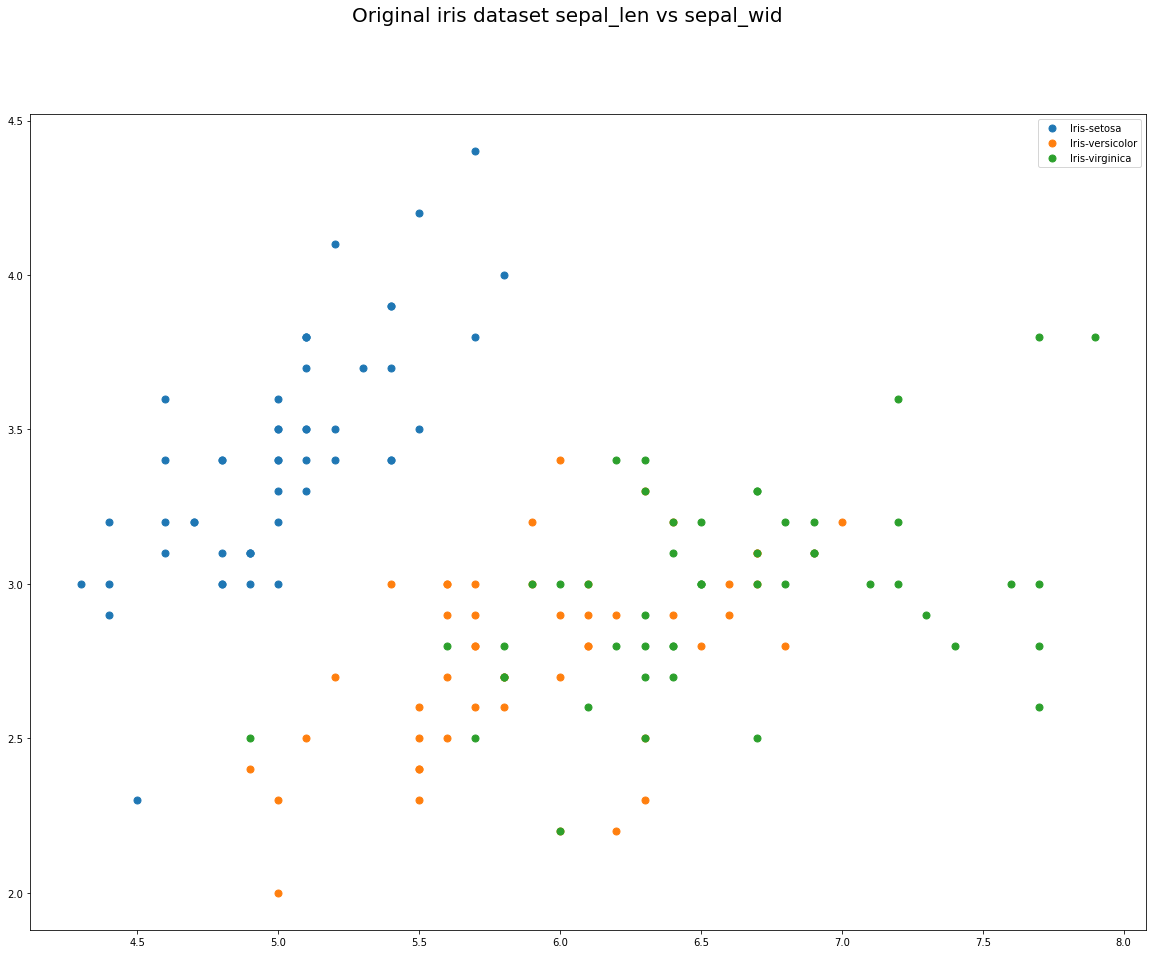

In [27]:
import matplotlib.pyplot as plt
groups = data.groupby('class')
fig, ax = plt.subplots(1,1,figsize=(20,15))


for name, group in groups:
    ax.plot(group.sepal_len, group.sepal_wid, marker='o', linestyle='', ms=7, label=name)
fig.suptitle("Original iris dataset sepal_len vs sepal_wid ", fontsize=20)    
ax.legend(numpoints=1)


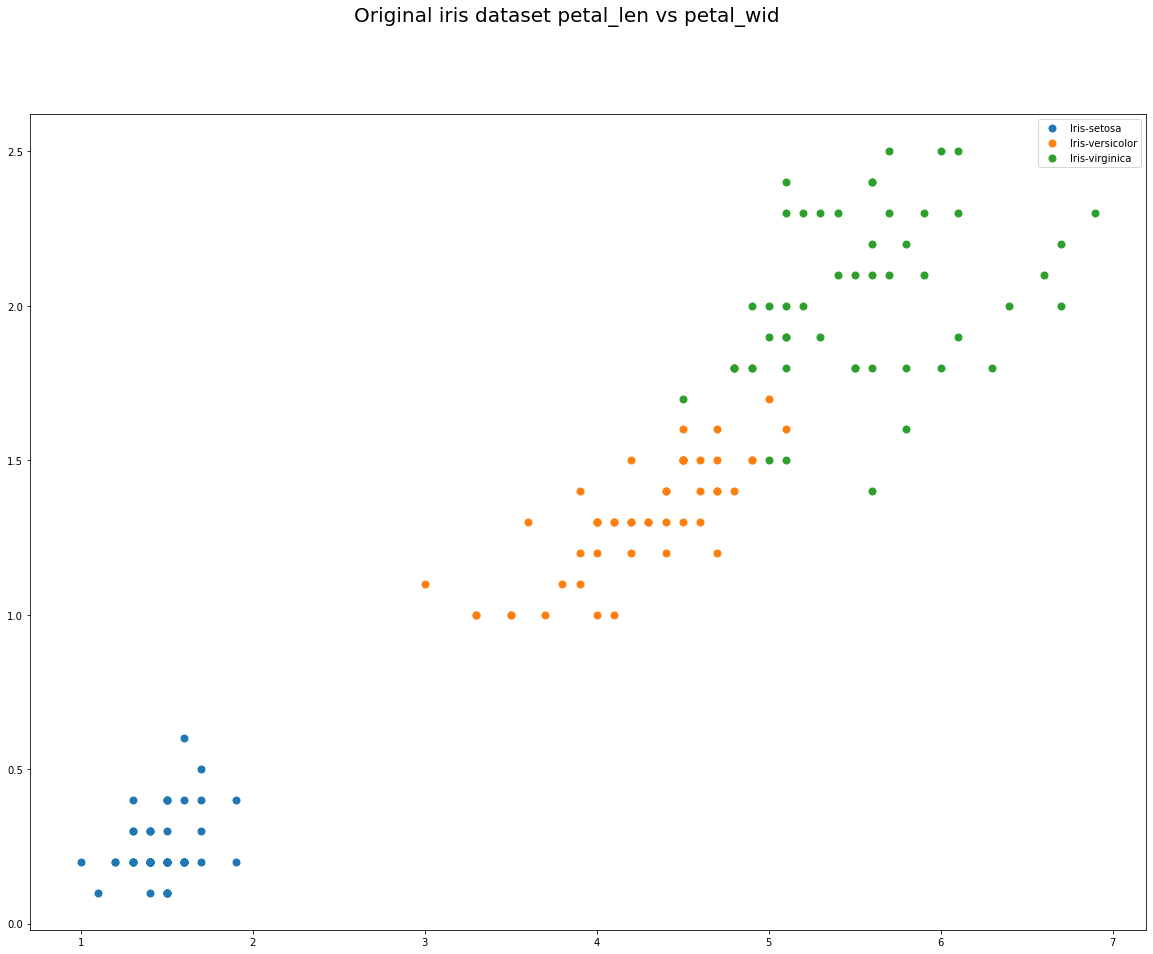

In [28]:
import matplotlib.pyplot as plt
groups = data.groupby('class')
fig, ax = plt.subplots(1,1,figsize=(20,15))


for name, group in groups:
    ax.plot(group.petal_len, group.petal_wid, marker='o', linestyle='', ms=7, label=name)
fig.suptitle("Original iris dataset petal_len vs petal_wid ", fontsize=20)    
ax.legend(numpoints=1)
